In [25]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress


In [2]:
csvfile = "Project_data_Children_under_5.csv"

In [3]:
dataframe = pd.read_csv(csvfile)

dataframe.head()

,state,Survey,Area,Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males),Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%),Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%),Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [4]:
dataframe.columns

Index(['state', 'Survey', 'Area',
       'Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)',
       'Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)',
       'Child Feeding Practices And Nutritional Status 

In [5]:
dataframe2 = dataframe.rename(columns={"Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)":"Gender_Aged_5years(Females per 1000 Males)",
                          "Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)":"Children_Registered",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)":"Children_Stunted_5years(Height-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)":"Children_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)":"Children_Severely_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)":"Children_Underweight_5years(Weight-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)":"Children_Breastfed_Within_One_Hour_Of_Birth_3years",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%)":"Children_Under_Age_6_Months_Exclusively_Breastfed",
                          "Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate_Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%)":"Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk",
                          "Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%":"Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"})
dataframe2.head()

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [6]:
Survey_NFHS = dataframe2.loc[dataframe2["Survey"] == "NFHS-3"]


df_nona = dataframe2.fillna(0)

In [7]:
Survey_NFHS3 = df_nona.loc[df_nona["Survey"] == "NFHS-3"]
Survey_NFHs3 = Survey_NFHS3.filter(items=['Children_Stunted_5years(Height-For-Age)', 'Children_Under_Age_6_Months_Exclusively_Breastfed'])
Zero_df = Survey_NFHs3[(Survey_NFHs3 > 0).all(axis=1)]
Zero_df


,Children_Stunted_5years(Height-For-Age),Children_Under_Age_6_Months_Exclusively_Breastfed
3,48.0,46.4
11,46.5,63.1
15,55.6,28.0
19,52.9,82.0
23,51.7,47.8
27,45.7,16.9
31,49.8,57.8
35,43.7,58.6
39,24.5,56.2
43,50.0,21.6


In [8]:
Survey_NFHS4 = df_nona.loc[df_nona["Survey"] == "NFHS-4"]


In [9]:
Survey_NFHS4_rural = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Rural"]
Survey_NFHS4_urban = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Urban"]
Survey_NFHS4_total = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Total"]

Survey_NFHs4_rural = Survey_NFHS4_rural.filter(items=['Children_Stunted_5years(Height-For-Age)', 'Children_Under_Age_6_Months_Exclusively_Breastfed'])
Zero_df_rural = Survey_NFHs4_rural[(Survey_NFHs4_rural > 0).all(axis=1)]

Survey_NFHs4_urban = Survey_NFHs4_rural.filter(items=['Children_Stunted_5years(Height-For-Age)', 'Children_Under_Age_6_Months_Exclusively_Breastfed'])
Zero_df_urban = Survey_NFHs4_urban[(Survey_NFHs4_urban > 0).all(axis=1)]

Survey_NFHs4_total = Survey_NFHS4_total.filter(items=['Children_Stunted_5years(Height-For-Age)', 'Children_Under_Age_6_Months_Exclusively_Breastfed'])
Zero_df_total = Survey_NFHs4_total[(Survey_NFHs4_total > 0).all(axis=1)]


Survey_NFHS4_rural2 = dataframe2.loc[dataframe2["Area"] == "Rural"]
Survey_NFHS4_urban2 = dataframe2.loc[dataframe2["Area"] == "Urban"]
Survey_NFHS4_Total2 = dataframe2.loc[dataframe2["Area"] == "Total"]

In [10]:
Top_five_Survey3 = Zero_df.nlargest(5,'Children_Stunted_5years(Height-For-Age)')

In [11]:
Bottom_five_Survey3 = Zero_df.nsmallest(5, 'Children_Stunted_5years(Height-For-Age)')

In [12]:
Zero_df_rural.nlargest(5,'Children_Stunted_5years(Height-For-Age)')
Zero_df_urban.nlargest(5,'Children_Stunted_5years(Height-For-Age)')
Zero_df_total.nlargest(5,'Children_Stunted_5years(Height-For-Age)')

,Children_Stunted_5years(Height-For-Age),Children_Under_Age_6_Months_Exclusively_Breastfed
12,48.3,53.5
68,46.3,41.6
28,45.3,64.8
100,43.8,35.8
40,42.0,58.2


In [13]:
Zero_df_rural.nsmallest(5,'Children_Stunted_5years(Height-For-Age)')
Zero_df_urban.nsmallest(5,'Children_Stunted_5years(Height-For-Age)')
Zero_df_total.nsmallest(5,'Children_Stunted_5years(Height-For-Age)')

,Children_Stunted_5years(Height-For-Age),Children_Under_Age_6_Months_Exclusively_Breastfed
36,19.7,53.3
84,20.1,60.9
124,23.3,66.8
136,23.4,52.3
144,23.7,45.5


In [14]:
topfive = Top_five_Survey3["Children_Stunted_5years(Height-For-Age)"]
bottomfive = Bottom_five_Survey3["Children_Stunted_5years(Height-For-Age)"]



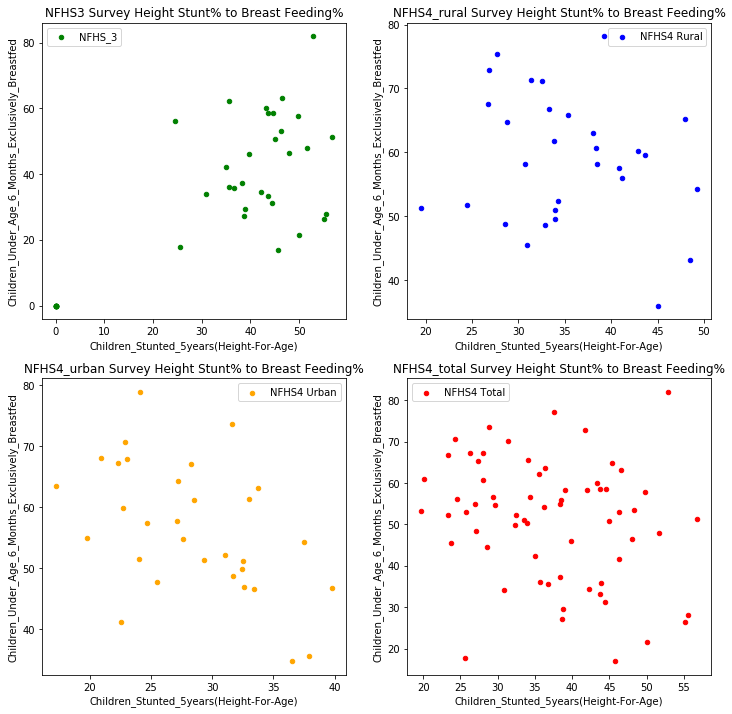

In [15]:
y1 = Survey_NFHS3["Children_Under_Age_6_Months_Exclusively_Breastfed"]
x2 = Survey_NFHS4_rural["Children_Stunted_5years(Height-For-Age)"]
y2 = Survey_NFHS4_rural["Children_Under_Age_6_Months_Exclusively_Breastfed"]
x3 = Survey_NFHS4_urban["Children_Stunted_5years(Height-For-Age)"]
y3 = Survey_NFHS4_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"]
x4 = Survey_NFHS4_total["Children_Stunted_5years(Height-For-Age)"]
y4 = Survey_NFHS4_total["Children_Under_Age_6_Months_Exclusively_Breastfed"]



#NFHS4 Female Child per 1000 males per state
x_join1 = Survey_NFHS3[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]
x_join2 = Survey_NFHS4_rural2[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]
x_join3 = Survey_NFHS4_urban2[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]
x_join4 = Survey_NFHS4_Total2[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]




fig, axes = plt.subplots(nrows=2, ncols=2)
x_join1.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[0,0],color="green", title="NFHS3 Survey Height Stunt% to Breast Feeding%", label= "NFHS_3",figsize=(12,12))
x_join2.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[0,1],color="blue", title="NFHS4_rural Survey Height Stunt% to Breast Feeding%", label= "NFHS4 Rural",figsize=(12,12))
x_join3.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[1,0],color="orange",title="NFHS4_urban Survey Height Stunt% to Breast Feeding%",label= "NFHS4 Urban",figsize=(12,12))
x_join4.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[1,1],color="red",title="NFHS4_total Survey Height Stunt% to Breast Feeding%",label= "NFHS4 Total",figsize=(12,12))

plt.savefig('Scatterplot.png')

The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed 0.16


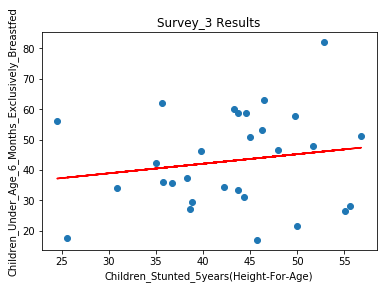

In [16]:
corr=round(st.pearsonr(Zero_df["Children_Stunted_5years(Height-For-Age)"],Zero_df["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed {corr}")
model = st.linregress(Zero_df["Children_Stunted_5years(Height-For-Age)"],Zero_df["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Zero_df["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Zero_df["Children_Stunted_5years(Height-For-Age)"],Zero_df["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Zero_df["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.title('Survey_3 Results')
plt.savefig('Regression1')
plt.show()


The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Rural) -0.19


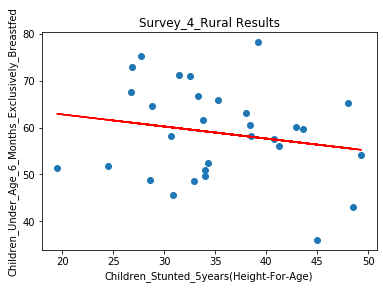

In [17]:
corr=round(st.pearsonr(Zero_df_rural["Children_Stunted_5years(Height-For-Age)"],Zero_df_rural["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Rural) {corr}")
model = st.linregress(Zero_df_rural["Children_Stunted_5years(Height-For-Age)"],Zero_df_rural["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Zero_df_rural["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Zero_df_rural["Children_Stunted_5years(Height-For-Age)"],Zero_df_rural["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Zero_df_rural["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.title('Survey_4_Rural Results')
plt.savefig('Regression2')
plt.show()


The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Urban) -0.19


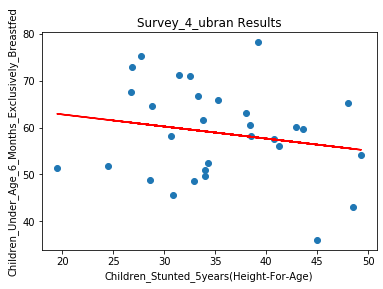

In [30]:
corr=round(st.pearsonr(Zero_df_urban["Children_Stunted_5years(Height-For-Age)"],Zero_df_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Urban) {corr}")
model = st.linregress(Zero_df_urban["Children_Stunted_5years(Height-For-Age)"],Zero_df_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Zero_df_urban["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Zero_df_urban["Children_Stunted_5years(Height-For-Age)"],Zero_df_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Zero_df_urban["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.title('Survey_4_ubran Results')
plt.savefig('Regression3')
plt.show()


The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Total) -0.12


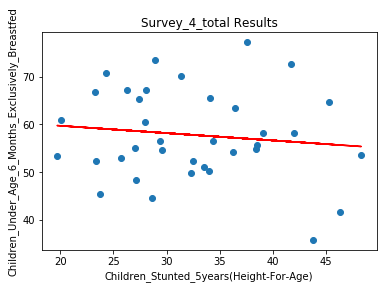

In [19]:
corr=round(st.pearsonr(Zero_df_total["Children_Stunted_5years(Height-For-Age)"],Zero_df_total["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Total) {corr}")
model = st.linregress(Zero_df_total["Children_Stunted_5years(Height-For-Age)"],Zero_df_total["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Zero_df_total["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Zero_df_total["Children_Stunted_5years(Height-For-Age)"],Zero_df_total["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Zero_df_total["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.title('Survey_4_total Results')
plt.savefig('Regression4')
plt.show()


In [20]:
Survey_NFHs4_rural3 = Survey_NFHS4_total.filter(items=['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk','Children_Under_Age_6_Months_Exclusively_Breastfed','Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet','Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet'])
Zero_df_rural2 = Survey_NFHs4_rural3[(Survey_NFHs4_rural3 > 0).any(axis=1)]


In [21]:
Zero_df_rural2

,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,42.7,54.9,8.7,14.3
4,56.1,70.2,6.5,11.9
8,49.9,63.5,8.7,10.8
12,30.7,53.5,7.3,9.2
16,53.8,77.2,11.1,8.4
20,49.4,55.8,5.8,2.8
24,35.9,50.3,7.0,10.0
28,47.2,64.8,7.2,7.1
32,46.0,54.2,5.8,14.4
36,63.1,53.3,21.3,22.3


In [22]:
xticks_names = Zero_df_rural2.rename(columns={"Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet":"BreastFed(6-23m)",
                                              "Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet":"Non-Breastfed(6-23m)",
                                              "Children_Under_Age_6_Months_Exclusively_Breastfed": "Exclusively BreastFed(6m)",
                                             "Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk":"Receiving Solid Food(6-8m)"})

Survey_NFHs4_rural32 = Survey_NFHS4_total.filter(items=['Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk','Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet','Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet'])
Zero_df_rural23 = Survey_NFHs4_rural32[(Survey_NFHs4_rural32 > 0).any(axis=1)]
xticks_names23 = Zero_df_rural23.rename(columns={"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet":"Non-Breastfed(6-23m)",
                                              "Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet":"Breast-Fed(6m-23m)",
                                             "Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk":"Receiving Solid Food(6-8m)"})

bar_average = xticks_names.mean()


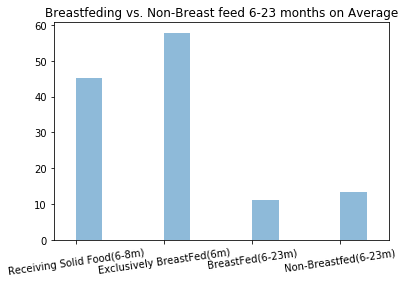

In [23]:
colors = ('green', 'blue')
bar_average.plot (kind="bar", title='Breastfeding vs. Non-Breast feed 6-23 months on Average', alpha=0.5, rot=8, align='edge', width=0.3)
plt.savefig('Bar_Chart')

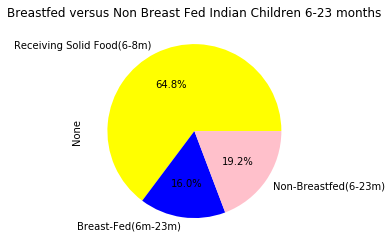

In [24]:

pie_average = xticks_names23.mean()


colors = ('yellow','blue','pink')
pie_average.plot(kind="pie",autopct='%1.1f%%', colors=colors, title="Breastfed versus Non Breast Fed Indian Children 6-23 months")
plt.savefig('Breastfed_Pie_Chart.png')